<a href="https://colab.research.google.com/github/MadhumithaJM/Codsoft-/blob/main/Task_1_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle (5).json
Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
titanic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic-dataset.zip
replace Titanic-Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Titanic-Dataset.csv     
Model Accuracy: 0.81

Classification Report Table:


/tmp/ipython-input-7-2652601583.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-7-2652601583.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,precision,recall,f1-score,support
0,0.83,0.86,0.84,105.00
1,0.79,0.74,0.76,74.00
accuracy,0.81,0.81,0.81,0.81
macro avg,0.81,0.80,0.80,179.00
weighted avg,0.81,0.81,0.81,179.00


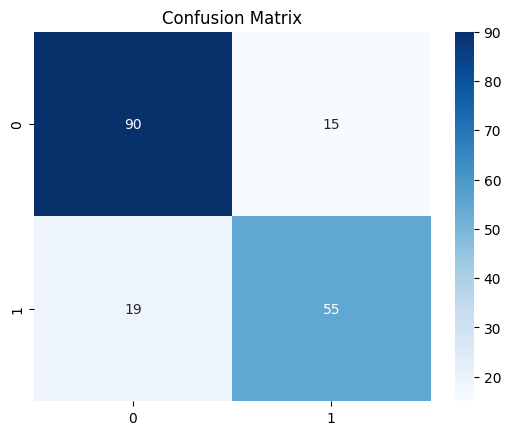

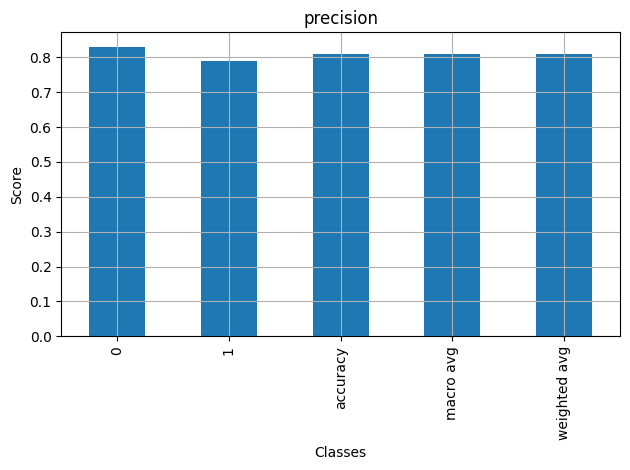

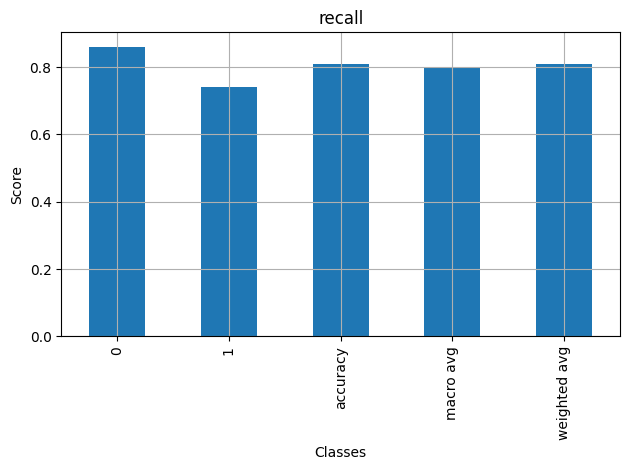

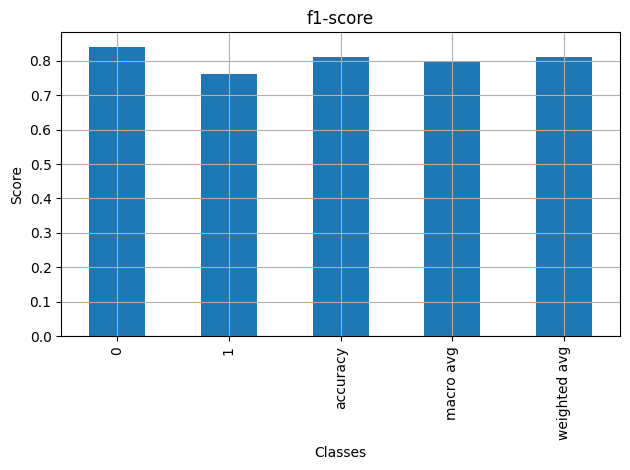

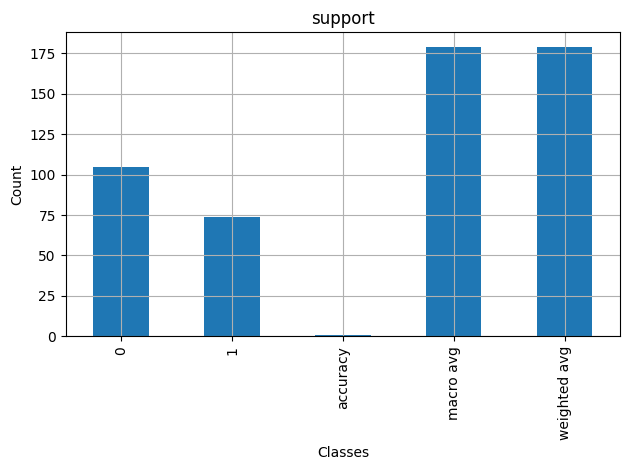

In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d yasserh/titanic-dataset
!unzip titanic-dataset.zip

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("Titanic-Dataset.csv")

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)

print("\nClassification Report Table:")
display(df_report)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plotting classification metrics
metrics = ['precision', 'recall', 'f1-score', 'support']

for metric in metrics:
    df_report[metric].dropna().plot(kind='bar', title=metric)
    plt.ylabel('Score' if metric != 'support' else 'Count')
    plt.xlabel('Classes')
    plt.grid(True)
    plt.tight_layout()
    plt.show()